# Econometria em Python


## Introdução
Python é uma linguagem de programação de uso geral, ou seja, própria para computação em qualquer área de atividade.  Vimos que os pacotes NumPy, SciPy, MatPlotLib e Pandas nos permitem fazer manipulação de dados e alguma análise estatística.  Não havia, porém, módulos para análise econométrica.

O objetivo destas notas é apresentar o pacote StatsModels que dá ao Python funcionalidades na área de econometria.

## Importação do módulos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf


## Leitura das séries de dados no SGS/BCB.

In [2]:
pib = pd.read_csv('http://api.bcb.gov.br/dados/serie/bcdata.sgs.22099/dados?formato=csv',
                  sep = ';', encoding = 'utf-8', decimal = ',')
consumo = pd.read_csv('http://api.bcb.gov.br/dados/serie/bcdata.sgs.22100/dados?formato=csv',
                  sep = ';', encoding = 'utf-8', decimal = ',')
consumoGoverno = pd.read_csv('http://api.bcb.gov.br/dados/serie/bcdata.sgs.22101/dados?formato=csv',
                  sep = ';', encoding = 'utf-8', decimal = ',')
investimento = pd.read_csv('http://api.bcb.gov.br/dados/serie/bcdata.sgs.22102/dados?formato=csv',
                  sep = ';', encoding = 'utf-8', decimal = ',')
exportacao = pd.read_csv('http://api.bcb.gov.br/dados/serie/bcdata.sgs.22103/dados?formato=csv',
                  sep = ';', encoding = 'utf-8', decimal = ',')
importacao = pd.read_csv('http://api.bcb.gov.br/dados/serie/bcdata.sgs.22104/dados?formato=csv',
                  sep = ';', encoding = 'utf-8', decimal = ',')

## Visualizando os dados

In [3]:
pib.head()

,data,valor
0,01/01/1995,100.00
1,01/04/1995,100.00
2,01/07/1995,100.00
3,01/10/1995,100.00
4,01/01/1996,96.84


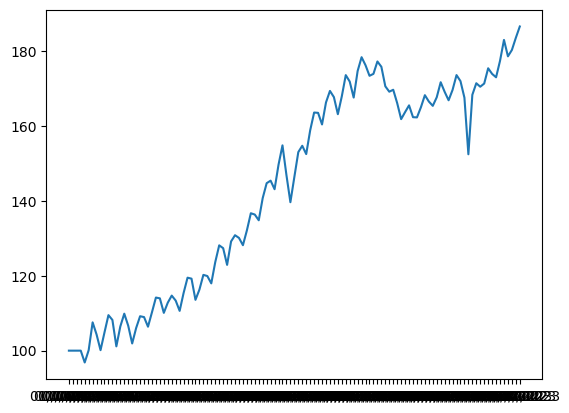

In [4]:
grafPib = plt.plot(pib.data, pib.valor)

plt.show()

In [5]:
consumo.head()

,data,valor
0,01/01/1995,100.00
1,01/04/1995,100.00
2,01/07/1995,100.00
3,01/10/1995,100.00
4,01/01/1996,96.06


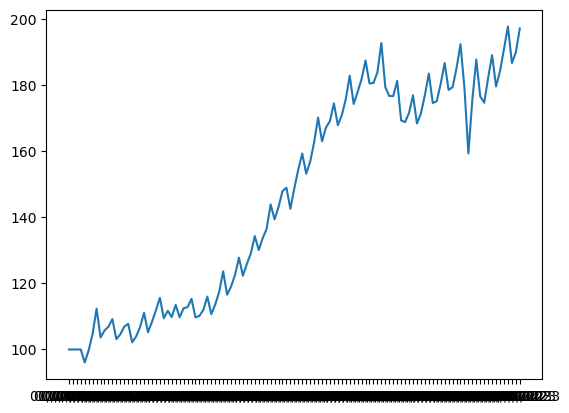

In [6]:
grafConsumo = plt.plot(consumo.data,consumo.valor)
plt.show()

In [7]:
consumoGoverno.head()

,data,valor
0,01/01/1995,100.00
1,01/04/1995,100.00
2,01/07/1995,100.00
3,01/10/1995,100.00
4,01/01/1996,96.12


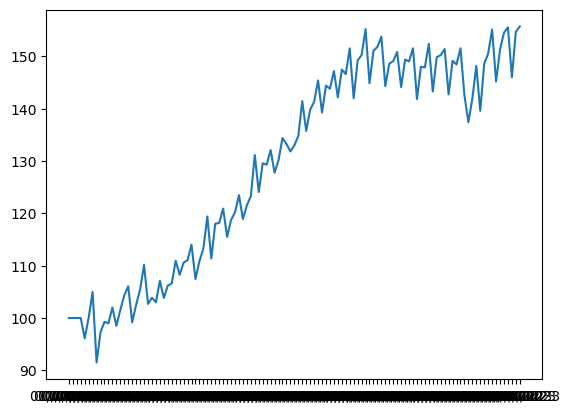

In [8]:
grafConsumoGoverno = plt.plot(consumoGoverno.data, consumoGoverno.valor)
plt.show()

In [9]:
investimento.head()

,data,valor
0,01/01/1995,100.00
1,01/04/1995,100.00
2,01/07/1995,100.00
3,01/10/1995,100.00
4,01/01/1996,92.91


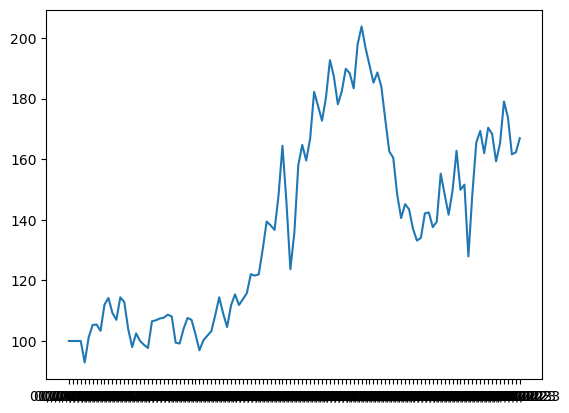

In [10]:
grafInvestimento = plt.plot(investimento.data, investimento.valor)
plt.show()

In [11]:
exportacao.head()

,data,valor
0,01/01/1995,100.00
1,01/04/1995,100.00
2,01/07/1995,100.00
3,01/10/1995,100.00
4,01/01/1996,95.16


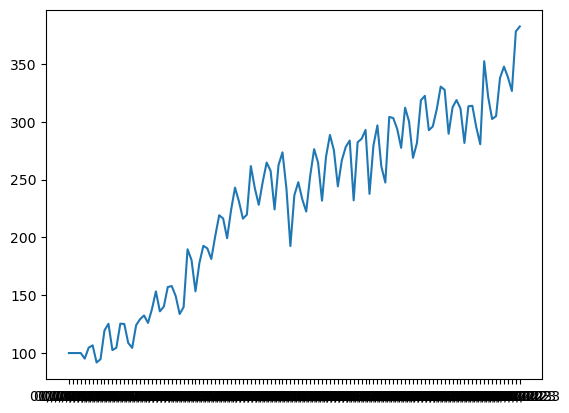

In [12]:
grafExportacao = plt.plot(exportacao.data, exportacao.valor)
plt.show()

In [13]:
importacao.head()

,data,valor
0,01/01/1995,100.00
1,01/04/1995,100.00
2,01/07/1995,100.00
3,01/10/1995,100.00
4,01/01/1996,82.07


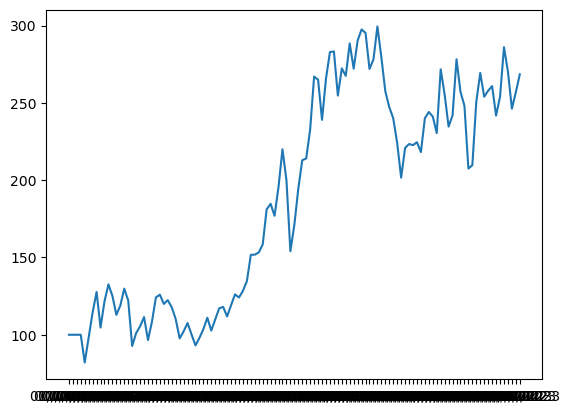

In [14]:
grafImportacao = plt.plot(importacao.data, importacao.valor)
plt.show()

## Calculando as diferenças logarítmicas das séries

In [15]:
dlogconsumo = np.log(consumo.valor).diff()
dlogconsumo.head()

0         NaN
1    0.000000
2    0.000000
3    0.000000
4   -0.040197
Name: valor, dtype: float64

In [16]:
dlogpib = np.log(pib.valor).diff()

dlogpib.head()


0        NaN
1    0.00000
2    0.00000
3    0.00000
4   -0.03211
Name: valor, dtype: float64

## Efetuando a regressão por mínimos quadrados ordinários

In [17]:
# Regressão
results = sm.OLS(dlogconsumo, dlogpib, missing = 'drop').fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  valor   R-squared (uncentered):                   0.411
Model:                            OLS   Adj. R-squared (uncentered):              0.406
Method:                 Least Squares   F-statistic:                              78.95
Date:                Tue, 12 Dec 2023   Prob (F-statistic):                    1.15e-14
Time:                        21:29:55   Log-Likelihood:                          237.97
No. Observations:                 114   AIC:                                     -473.9
Df Residuals:                     113   BIC:                                     -471.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Exercícios

1. Efetue o teste de raiz unitária ADF nas séries consumo e pib.

2. Estime os parâmetros de um processo auto-regressivo vetorial para as séries diferenciadas consumo e pib.

3. Efetue o teste de cointegração de Johansen para as séries consumo e pib.

4. Estime os parâmetros de um modelo de correção de erros vetorial.

**Dica:** Leia a documentação do StatsModels para descobrir como fazer esses exercícios.